In [293]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from nsepy import get_history
from datetime import date
import plotly.graph_objects as go
import os
from matplotlib.pyplot import figure
import pytz

In [260]:
import yfinance as yf 
data = yf.download(tickers="CANBK.NS", 
period="60d", 
interval="5m") 
data 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-02-22 09:15:00+05:30,160.050003,160.899994,158.350006,158.449997,158.449997,0
2021-02-22 09:20:00+05:30,158.500000,158.899994,157.899994,158.199997,158.199997,688975
2021-02-22 09:25:00+05:30,158.250000,160.399994,158.149994,160.399994,160.399994,678742
2021-02-22 09:30:00+05:30,160.449997,160.500000,159.350006,160.000000,160.000000,377930
2021-02-22 09:35:00+05:30,159.899994,160.399994,159.550003,159.550003,159.550003,307320
...,...,...,...,...,...,...
2021-05-24 15:05:00+05:30,155.000000,155.000000,154.300003,154.949997,154.949997,720148
2021-05-24 15:10:00+05:30,154.750000,155.100006,154.300003,154.449997,154.449997,610485
2021-05-24 15:15:00+05:30,154.449997,154.500000,153.899994,154.000000,154.000000,982849


In [261]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4.454000e+03
mean,148.911955,149.234205,148.577436,148.907925,148.907925,2.715569e+05
std,9.643096,9.649467,9.629257,9.636288,9.636288,2.766698e+05
min,124.400002,125.150002,124.349998,124.500000,124.500000,0.000000e+00
25%,142.912495,143.149994,142.600006,142.899994,142.899994,1.106315e+05
50%,149.600006,149.949997,149.250000,149.550003,149.550003,1.915575e+05
75%,156.100006,156.649994,155.737499,156.149994,156.149994,3.317395e+05
max,172.050003,172.399994,171.199997,172.149994,172.149994,4.224277e+06


In [262]:
df = pd.DataFrame(data)

In [263]:
df["TimeDate"] = df.index
df.dtypes

Open                              float64
High                              float64
Low                               float64
Close                             float64
Adj Close                         float64
Volume                              int64
TimeDate     datetime64[ns, Asia/Kolkata]
dtype: object

In [264]:
df["TimeDate"] = df.index
df.reset_index(drop = True,inplace = True)
df['TimeDate'] = df['TimeDate'].dt.tz_localize(None)

In [265]:
df['Date'] = pd.to_datetime(df['TimeDate']).dt.date
df['Time'] = pd.to_datetime(df['TimeDate']).dt.time
df['period'] = df["Time"].astype('string')
# df['Date'] = df["Date"].astype('string')

In [266]:
df

,Open,High,Low,Close,Adj Close,Volume,TimeDate,Date,Time,period
0,160.050003,160.899994,158.350006,158.449997,158.449997,0,2021-02-22 09:15:00,2021-02-22,09:15:00,09:15:00
1,158.500000,158.899994,157.899994,158.199997,158.199997,688975,2021-02-22 09:20:00,2021-02-22,09:20:00,09:20:00
2,158.250000,160.399994,158.149994,160.399994,160.399994,678742,2021-02-22 09:25:00,2021-02-22,09:25:00,09:25:00
3,160.449997,160.500000,159.350006,160.000000,160.000000,377930,2021-02-22 09:30:00,2021-02-22,09:30:00,09:30:00
4,159.899994,160.399994,159.550003,159.550003,159.550003,307320,2021-02-22 09:35:00,2021-02-22,09:35:00,09:35:00
...,...,...,...,...,...,...,...,...,...,...
4449,155.000000,155.000000,154.300003,154.949997,154.949997,720148,2021-05-24 15:05:00,2021-05-24,15:05:00,15:05:00
4450,154.750000,155.100006,154.300003,154.449997,154.449997,610485,2021-05-24 15:10:00,2021-05-24,15:10:00,15:10:00
4451,154.449997,154.500000,153.899994,154.000000,154.000000,982849,2021-05-24 15:15:00,2021-05-24,15:15:00,15:15:00
4452,154.149994,154.300003,153.800003,154.000000,154.000000,776440,2021-05-24 15:20:00,2021-05-24,15:20:00,15:20:00


In [267]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
TimeDate     0
Date         0
Time         0
period       0
dtype: int64

In [268]:
df.to_excel("Canara.xlsx")

In [269]:
close = df['Close']
open = df['Open']
timeframe = df['TimeDate']
time = df['Time']
vol = df["Volume"]
period = df['period']
print(period)

0       09:15:00
1       09:20:00
2       09:25:00
3       09:30:00
4       09:35:00
          ...   
4449    15:05:00
4450    15:10:00
4451    15:15:00
4452    15:20:00
4453    15:25:00
Name: period, Length: 4454, dtype: string


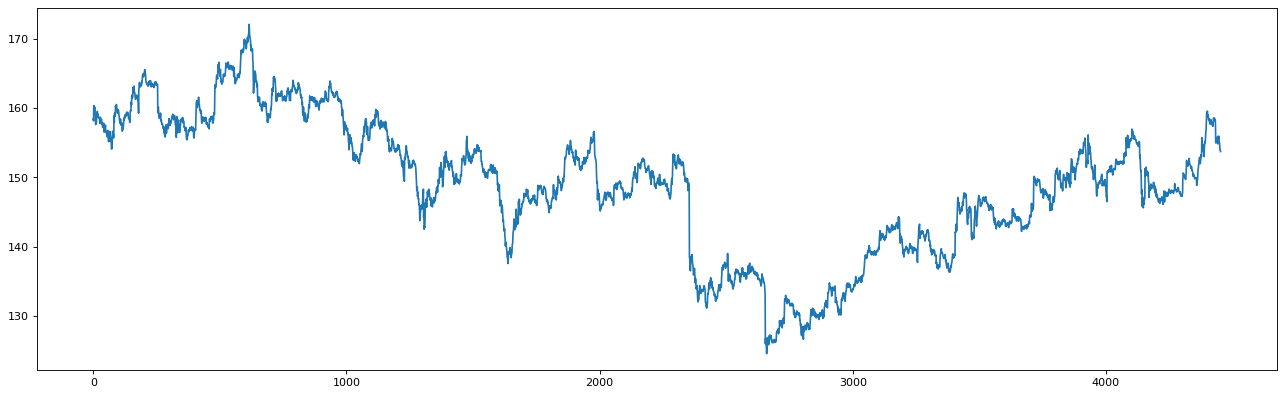

In [270]:
figure(figsize=(20, 6), dpi=80)
plt.plot(close)
# plt.plot(open)

In [271]:
df.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
TimeDate     datetime64[ns]
Date                 object
Time                 object
period               string
dtype: object

In [272]:
figure(figsize=(20, 6), dpi=80)
fig = go.Figure(data=[go.Candlestick(x=df['TimeDate'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[15.5, 9.25], pattern="hour"),  # hide hours outside of 9.30am-4pm
             #dict(values=["2021-12-25", "2021-1-26","2021-3-11","2021-3-29","2021-4-02","2021-4-14","2021-4-21","2021-05-13","2021-07-21","2021-8-19","2021-09-10","2021-10-15","2021-11-05",])  # hide holidays (Christmas and New Year's, etc)
        ]
    )

fig.show()

<Figure size 1600x480 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

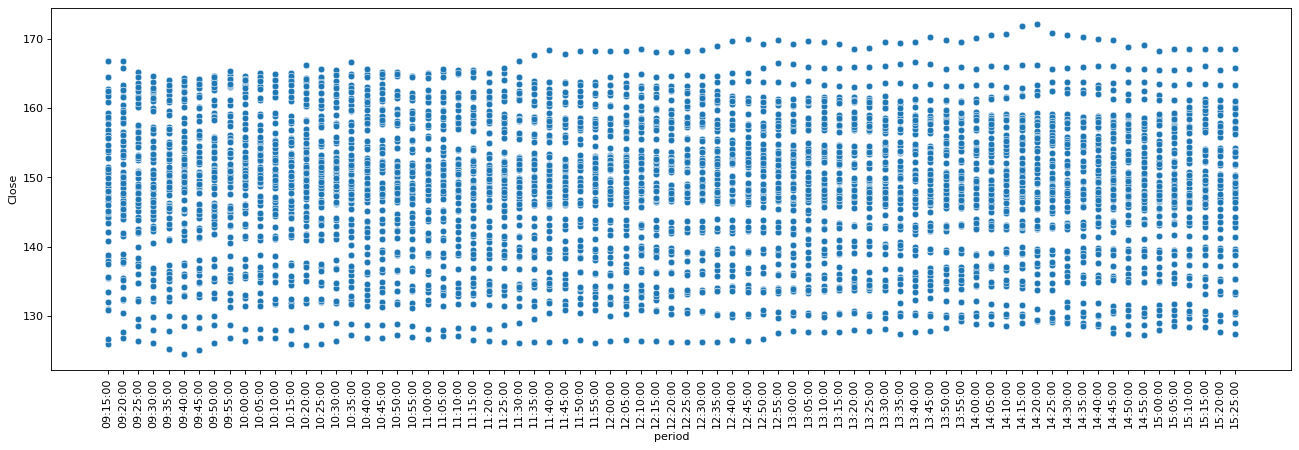

In [273]:

figure(figsize=(20, 6), dpi=80)

sns.scatterplot(x = period,y = close,data=df)

plt.xticks(rotation=90)

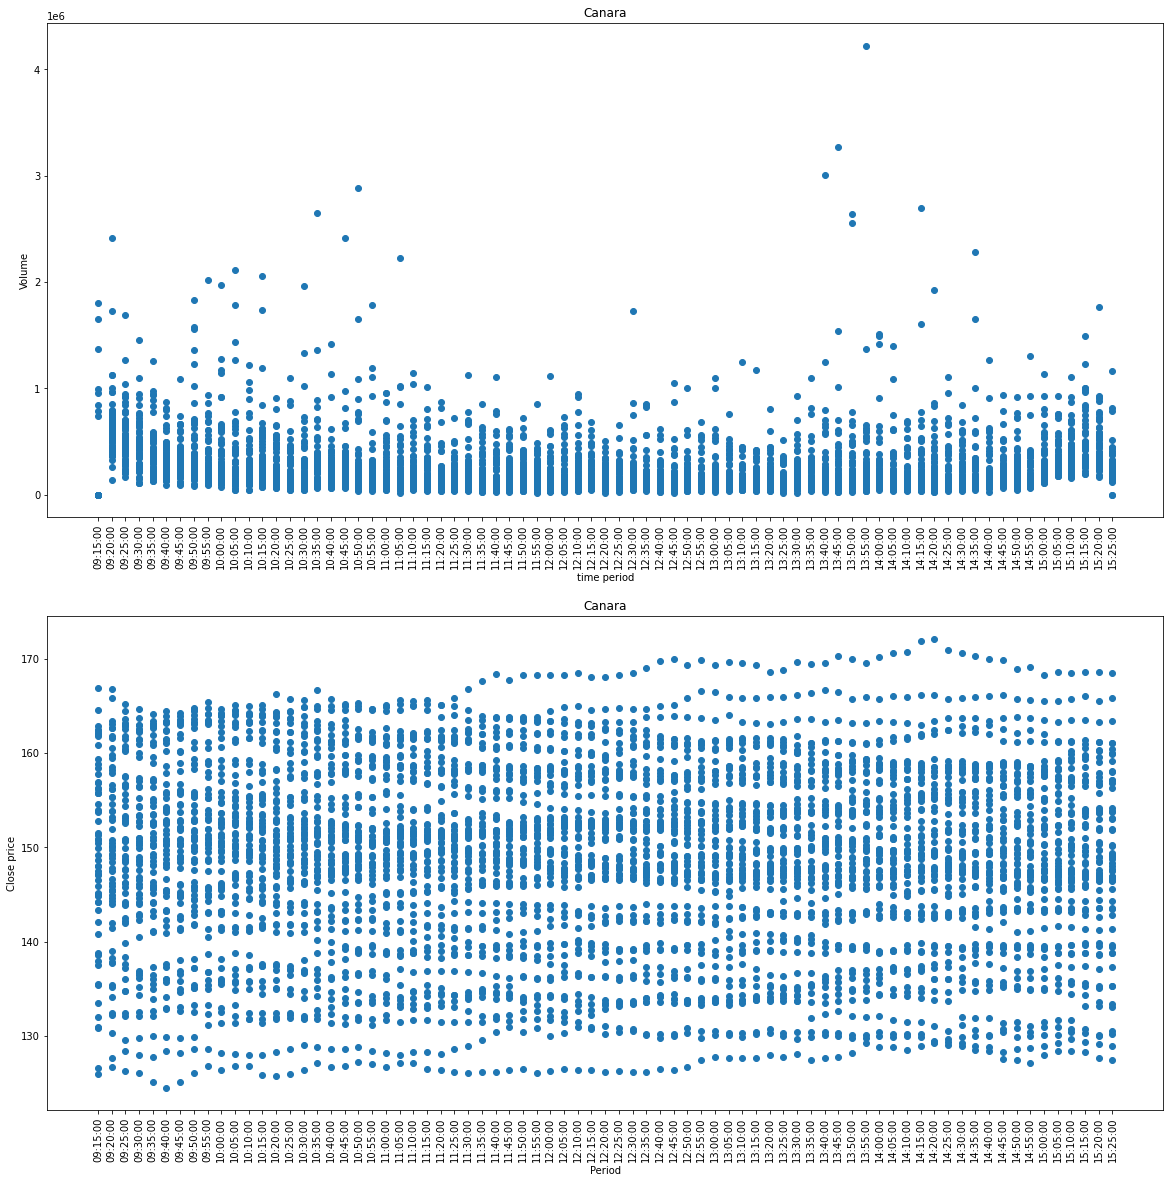

In [295]:

fig, ax = plt.subplots(2, figsize=(20, 20))
plt.xticks(rotation=90)
ax[0].scatter(x = df['period'], y = df['Volume'])
ax[0].set_xlabel("time period")
ax[0].set_ylabel("Volume")

ax[1].scatter(x = df['period'], y = df['Close'])
ax[1].set_xlabel("Period")
ax[1].set_ylabel("Close price")
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)
    plt.title("Canara")
plt.show()

C:\Users\hari4\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='period', ylabel='Volume'>

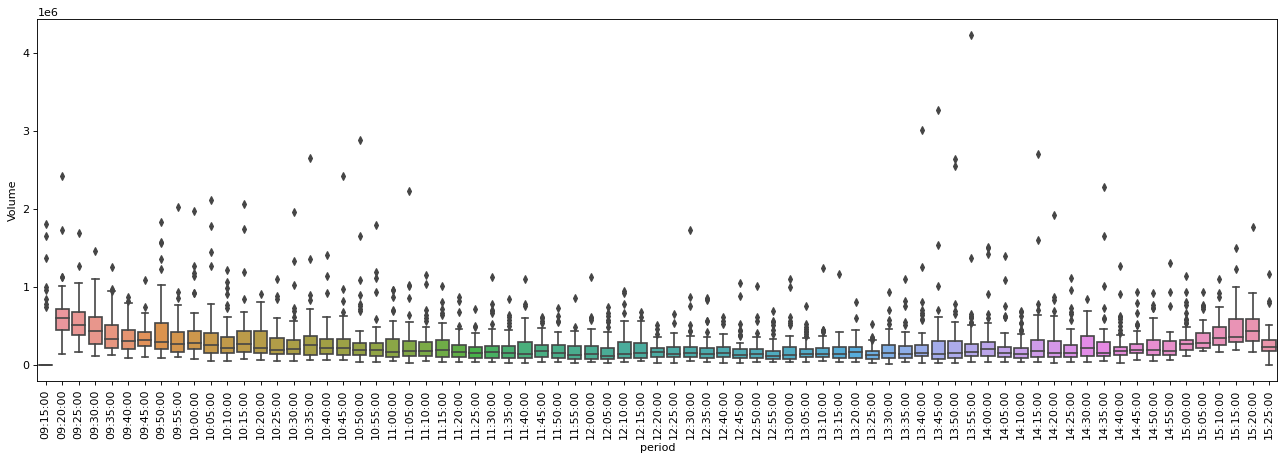

In [306]:
figure(figsize=(20, 6), dpi=80)
plt.xticks(rotation=90)
sns.boxplot(period,vol,data=df)


In [320]:
df.index[df["Volume"]==df["Volume"].max()]

Int64Index([4435], dtype='int64')

In [329]:
df.loc[ df.index[df["Volume"]==df["Volume"].max()]]

,Open,High,Low,Close,Adj Close,Volume,TimeDate,Date,Time,period
4435,154.949997,155.100006,153.149994,155.0,155.0,4224277,2021-05-24 13:55:00,2021-05-24,13:55:00,13:55:00


In [327]:
day = df.loc[4435].Date

datetime.date(2021, 5, 24)